<a href="https://colab.research.google.com/github/jangirsachin9619-cpu/ml5-clustering-and-neural-network-models-/blob/main/ML5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/Food_Delivery_Time_Prediction.csv'
data=pd.read_csv(path)
data.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [4]:
data.isnull().sum()

,0
Order_ID,0
Customer_Location,0
Restaurant_Location,0
Distance,0
Weather_Conditions,0
Traffic_Conditions,0
Delivery_Person_Experience,0
Order_Priority,0
Order_Time,0
Vehicle_Type,0


In [5]:
data.fillna(method='ffill',inplace=True)

/tmp/ipython-input-715/286314875.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill',inplace=True)


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Weather_Conditions']=le.fit_transform(data['Weather_Conditions'])
data['Traffic_Conditions']=le.fit_transform(data['Traffic_Conditions'])
data['Order_Priority']=le.fit_transform(data['Order_Priority'])
data['Order_Time']=le.fit_transform(data['Order_Time'])
data['Vehicle_Type']=le.fit_transform(data['Vehicle_Type'])
data.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,4,2,0,2,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,8,1,3,2,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,9,0,3,1,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,2,2,1,1,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,6,1,3,1,3.5,2.8,32.38,619.81,2.34


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Distance', 'Delivery_Person_Experience', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time', 'Order_Cost', 'Tip_Amount']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
data.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",-1.454738,1,2,-0.456512,2,0,2,0.515500,-0.987317,-1.487932,0.501852,1.192403
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",1.439192,0,2,1.004325,1,3,2,1.085900,0.738511,-0.264987,-1.634294,-0.600810
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",-0.666417,2,2,1.369535,0,3,1,-0.625302,-0.412041,-0.741529,1.092646,0.599332
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.335835,0,1,-1.186930,2,1,1,-0.767902,0.019416,1.382411,-0.923323,1.113532
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",-0.700119,1,0,0.273907,1,3,1,-0.340101,-1.274955,-1.280915,-0.779755,-1.511757


In [8]:
print("First 5 values of 'Distance' column:")
print(data['Distance'].head())

First 5 values of 'Distance' column:
0   -1.454738
1    1.439192
2   -0.666417
3    0.335835
4   -0.700119
Name: Distance, dtype: float64


In [9]:
def get_order_hour(order_time):
    if order_time == 'Morning':
        return 9  # Example: 9 AM
    elif order_time == 'Afternoon':
        return 14 # Example: 2 PM
    elif order_time == 'Evening':
        return 19 # Example: 7 PM
    elif order_time == 'Night':
        return 22 # Example: 10 PM
    return 0 # Default or unknown

data['Order_Hour'] = data['Order_Time'].apply(get_order_hour)

def is_rush_hour(hour):
    return 1 if (7 <= hour <= 9) or (17 <= hour <= 19) else 0

data['Rush_Hour'] = data['Order_Hour'].apply(is_rush_hour)

def get_day_part(order_time):
    if order_time in ['Morning']:
        return 'Morning'
    elif order_time in ['Afternoon']:
        return 'Afternoon'
    elif order_time in ['Evening']:
        return 'Evening'
    elif order_time in ['Night']:
        return 'Night'
    return 'Unknown'

data['Day_Part'] = data['Order_Time'].apply(get_day_part)

data.head()
print("Unique values and counts for 'Day_Part':")
print(data['Day_Part'].value_counts())

Unique values and counts for 'Day_Part':
Day_Part
Unknown    200
Name: count, dtype: int64


In [10]:
le_day_part = LabelEncoder()
data['Day_Part'] = le_day_part.fit_transform(data['Day_Part'])
data.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Order_Hour,Rush_Hour,Day_Part
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",-1.454738,1,2,-0.456512,2,0,2,0.515500,-0.987317,-1.487932,0.501852,1.192403,0,0,0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",1.439192,0,2,1.004325,1,3,2,1.085900,0.738511,-0.264987,-1.634294,-0.600810,0,0,0
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",-0.666417,2,2,1.369535,0,3,1,-0.625302,-0.412041,-0.741529,1.092646,0.599332,0,0,0
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.335835,0,1,-1.186930,2,1,1,-0.767902,0.019416,1.382411,-0.923323,1.113532,0,0,0
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",-0.700119,1,0,0.273907,1,3,1,-0.340101,-1.274955,-1.280915,-0.779755,-1.511757,0,0,0


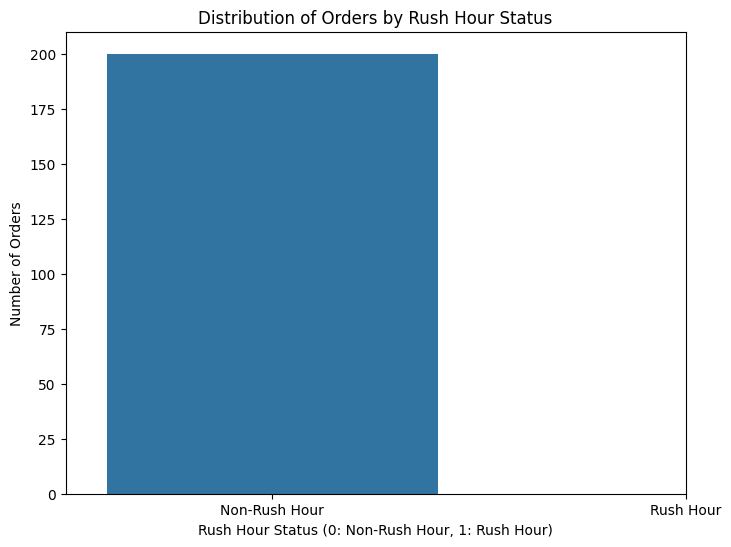

In [11]:
rush_hour_counts = data['Rush_Hour'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=rush_hour_counts.index, y=rush_hour_counts.values)
plt.title('Distribution of Orders by Rush Hour Status')
plt.xlabel('Rush Hour Status (0: Non-Rush Hour, 1: Rush Hour)')
plt.ylabel('Number of Orders')
plt.xticks(ticks=[0, 1], labels=['Non-Rush Hour', 'Rush Hour'])
plt.show()

In [12]:
def extract_coordinates(location_str):
    location_str = location_str.replace('(', '').replace(')', '')
    latitude, longitude = map(float, location_str.split(', '))
    return latitude, longitude

data[['Customer_Latitude', 'Customer_Longitude']] = data['Customer_Location'].apply(lambda x: pd.Series(extract_coordinates(x)))
data[['Restaurant_Latitude', 'Restaurant_Longitude']] = data['Restaurant_Location'].apply(lambda x: pd.Series(extract_coordinates(x)))

data.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,...,Delivery_Time,Order_Cost,Tip_Amount,Order_Hour,Rush_Hour,Day_Part,Customer_Latitude,Customer_Longitude,Restaurant_Latitude,Restaurant_Longitude
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",-1.454738,1,2,-0.456512,2,0,2,...,-1.487932,0.501852,1.192403,0,0,0,17.030479,79.743077,12.358515,85.100083
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",1.439192,0,2,1.004325,1,3,2,...,-0.264987,-1.634294,-0.600810,0,0,0,15.398319,86.639122,14.174874,77.025606
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",-0.666417,2,2,1.369535,0,3,1,...,-0.741529,1.092646,0.599332,0,0,0,15.687342,83.888808,19.594748,82.048482
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.335835,0,1,-1.186930,2,1,1,...,1.382411,-0.923323,1.113532,0,0,0,20.415599,78.046984,16.915906,78.278698
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",-0.700119,1,0,0.273907,1,3,1,...,-1.280915,-0.779755,-1.511757,0,0,0,14.786904,78.706532,15.206038,86.203182


In [13]:
features_for_clustering = [
    'Distance', 'Weather_Conditions', 'Traffic_Conditions',
    'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
    'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating',
    'Delivery_Time', 'Order_Cost', 'Tip_Amount', 'Order_Hour',
    'Rush_Hour', 'Day_Part', 'Customer_Latitude', 'Customer_Longitude',
    'Restaurant_Latitude', 'Restaurant_Longitude'
]

X = data[features_for_clustering]
X.head()

,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Order_Hour,Rush_Hour,Day_Part,Customer_Latitude,Customer_Longitude,Restaurant_Latitude,Restaurant_Longitude
0,-1.454738,1,2,-0.456512,2,0,2,0.515500,-0.987317,-1.487932,0.501852,1.192403,0,0,0,17.030479,79.743077,12.358515,85.100083
1,1.439192,0,2,1.004325,1,3,2,1.085900,0.738511,-0.264987,-1.634294,-0.600810,0,0,0,15.398319,86.639122,14.174874,77.025606
2,-0.666417,2,2,1.369535,0,3,1,-0.625302,-0.412041,-0.741529,1.092646,0.599332,0,0,0,15.687342,83.888808,19.594748,82.048482
3,0.335835,0,1,-1.186930,2,1,1,-0.767902,0.019416,1.382411,-0.923323,1.113532,0,0,0,20.415599,78.046984,16.915906,78.278698
4,-0.700119,1,0,0.273907,1,3,1,-0.340101,-1.274955,-1.280915,-0.779755,-1.511757,0,0,0,14.786904,78.706532,15.206038,86.203182


In [14]:
from sklearn.preprocessing import LabelEncoder

# Re-apply label encoding to 'Order_Time' and 'Day_Part' to ensure they are numerical
# It appears these columns reverted to string types after previous operations.
if data['Order_Time'].dtype == 'object':
    le_order_time_fix = LabelEncoder()
    data['Order_Time'] = le_order_time_fix.fit_transform(data['Order_Time'])

if data['Day_Part'].dtype == 'object':
    le_day_part_fix = LabelEncoder()
    data['Day_Part'] = le_day_part_fix.fit_transform(data['Day_Part'])

features_for_clustering = [
    'Distance', 'Weather_Conditions', 'Traffic_Conditions',
    'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
    'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating',
    'Delivery_Time', 'Order_Cost', 'Tip_Amount', 'Order_Hour',
    'Rush_Hour', 'Day_Part', 'Customer_Latitude', 'Customer_Longitude',
    'Restaurant_Latitude', 'Restaurant_Longitude'
]

X = data[features_for_clustering]
X.head()

,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Order_Hour,Rush_Hour,Day_Part,Customer_Latitude,Customer_Longitude,Restaurant_Latitude,Restaurant_Longitude
0,-1.454738,1,2,-0.456512,2,0,2,0.515500,-0.987317,-1.487932,0.501852,1.192403,0,0,0,17.030479,79.743077,12.358515,85.100083
1,1.439192,0,2,1.004325,1,3,2,1.085900,0.738511,-0.264987,-1.634294,-0.600810,0,0,0,15.398319,86.639122,14.174874,77.025606
2,-0.666417,2,2,1.369535,0,3,1,-0.625302,-0.412041,-0.741529,1.092646,0.599332,0,0,0,15.687342,83.888808,19.594748,82.048482
3,0.335835,0,1,-1.186930,2,1,1,-0.767902,0.019416,1.382411,-0.923323,1.113532,0,0,0,20.415599,78.046984,16.915906,78.278698
4,-0.700119,1,0,0.273907,1,3,1,-0.340101,-1.274955,-1.280915,-0.779755,-1.511757,0,0,0,14.786904,78.706532,15.206038,86.203182


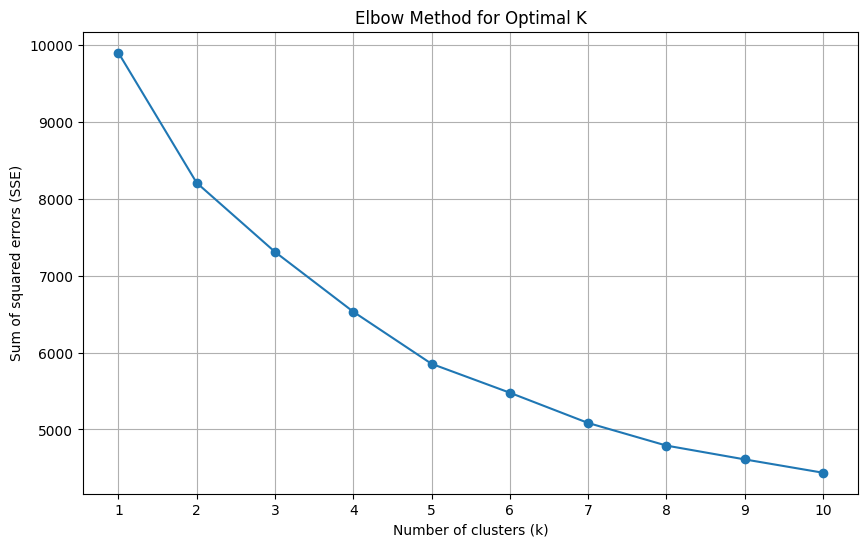

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init to suppress warning
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [16]:
optimal_k = 3 # Assuming k=3 is the elbow point from the plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)
data['Cluster'] = clusters
data.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,...,Order_Cost,Tip_Amount,Order_Hour,Rush_Hour,Day_Part,Customer_Latitude,Customer_Longitude,Restaurant_Latitude,Restaurant_Longitude,Cluster
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",-1.454738,1,2,-0.456512,2,0,2,...,0.501852,1.192403,0,0,0,17.030479,79.743077,12.358515,85.100083,2
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",1.439192,0,2,1.004325,1,3,2,...,-1.634294,-0.600810,0,0,0,15.398319,86.639122,14.174874,77.025606,0
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",-0.666417,2,2,1.369535,0,3,1,...,1.092646,0.599332,0,0,0,15.687342,83.888808,19.594748,82.048482,0
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.335835,0,1,-1.186930,2,1,1,...,-0.923323,1.113532,0,0,0,20.415599,78.046984,16.915906,78.278698,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",-0.700119,1,0,0.273907,1,3,1,...,-0.779755,-1.511757,0,0,0,14.786904,78.706532,15.206038,86.203182,2


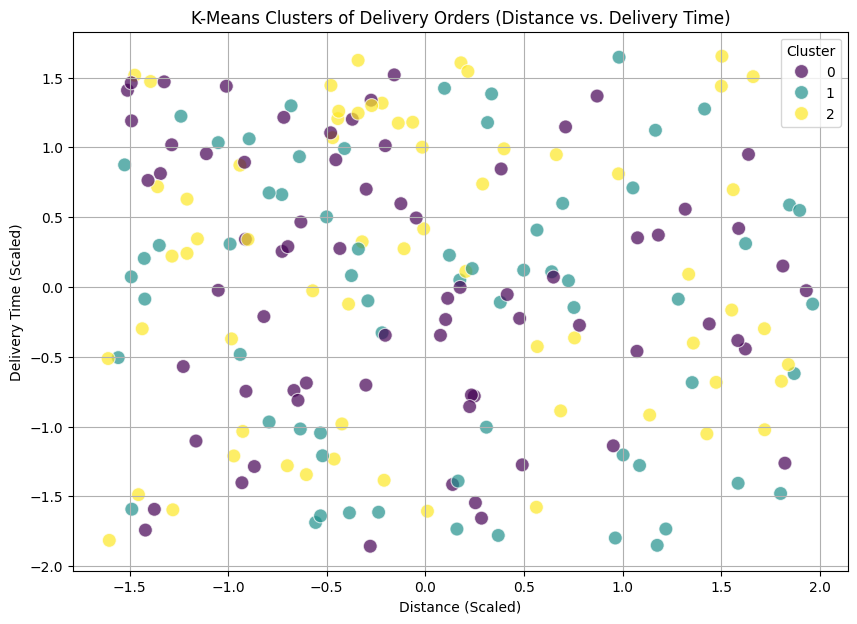

In [17]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Distance',
    y='Delivery_Time',
    hue='Cluster',
    data=data,
    palette='viridis',
    s=100,
    alpha=0.7
)
plt.title('K-Means Clusters of Delivery Orders (Distance vs. Delivery Time)')
plt.xlabel('Distance (Scaled)')
plt.ylabel('Delivery Time (Scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [18]:
cluster_features = [
    'Delivery_Time', 'Distance', 'Delivery_Person_Experience',
    'Restaurant_Rating', 'Customer_Rating', 'Order_Cost', 'Tip_Amount'
]

cluster_analysis = data.groupby('Cluster')[cluster_features].mean()
print("Mean values of key features per cluster:")
print(cluster_analysis)

Mean values of key features per cluster:
         Delivery_Time  Distance  Delivery_Person_Experience  \
Cluster                                                        
0             0.028385 -0.087445                   -0.003858   
1            -0.153526  0.112256                    0.071637   
2             0.124436 -0.017000                   -0.068477   

         Restaurant_Rating  Customer_Rating  Order_Cost  Tip_Amount  
Cluster                                                              
0                -0.038833        -0.053507   -0.056912    0.041640  
1                 0.162290         0.054817   -0.029892    0.073229  
2                -0.121745         0.003685    0.093495   -0.120567  



```python
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Agglomerative Clustering
# We will use 'ward' linkage as it's common for minimizing the variance of the clusters being merged.
# We don't specify n_clusters yet, as we want to visualize the dendrogram first to determine it.
hierarchical_clustering = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold=0)
hierarchical_clustering.fit(X)

# Generate the linkage matrix for the dendrogram
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    # truncate_mode='lastp',  # show only the last p merged clusters
    # p=30,  # show only the last 12 merged clusters
    show_leaf_counts=True, # show the number of points in each leaf
    color_threshold=200 # You might need to adjust this threshold based on the actual distances in your dendrogram
)
plt.axhline(y=200, color='r', linestyle='--', label='Cut-off Threshold (Example)') # Example threshold line
plt.legend()
plt.show()

print("\nDendrogram displayed. Please review the dendrogram to determine the optimal number of clusters.")
print("Look for the longest vertical lines that are not intersected by any horizontal line, which often suggest natural cluster separations.")
```

In [19]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Instantiate AgglomerativeClustering with n_clusters=None, linkage='ward', and distance_threshold=0
agg_clustering = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold=0)

# Fit the model to the feature set X
agg_clustering.fit(X)

# Generate the linkage matrix Z using the 'ward' method on X
Z = linkage(X, method='ward')

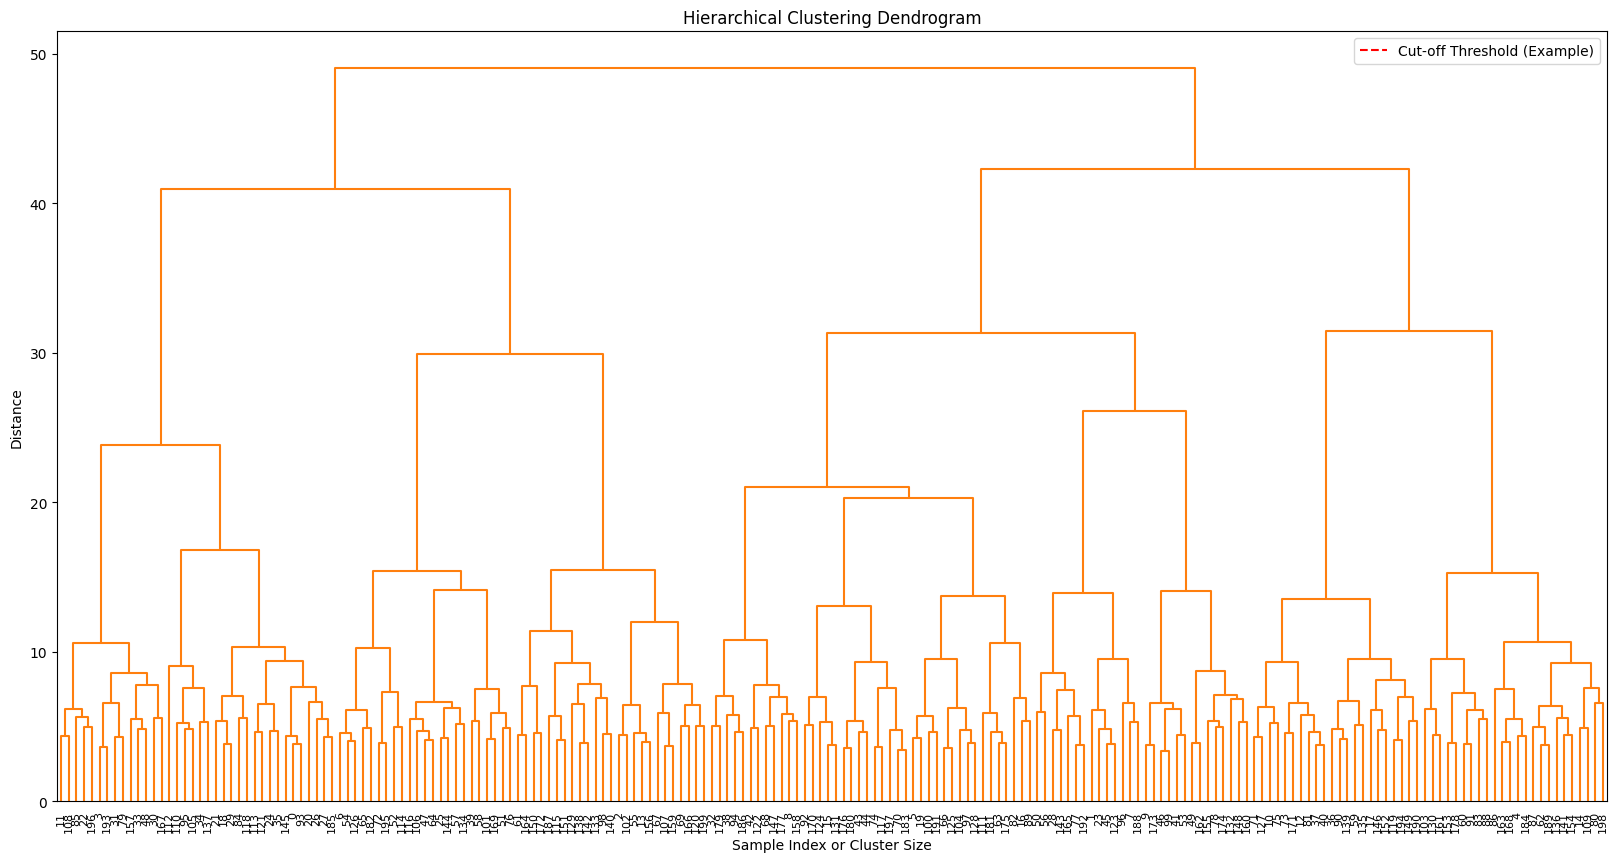


Dendrogram displayed. Please review the dendrogram to determine the optimal number of clusters.
Look for the longest vertical lines that are not intersected by any horizontal line, which often suggest natural cluster separations.


In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate the linkage matrix for the dendrogram (already done in the previous step, using Z)

# Plot the dendrogram
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    show_leaf_counts=True, # show the number of points in each leaf
    color_threshold=200 # Example threshold, adjust based on Z values if needed
)
plt.axhline(y=200, color='r', linestyle='--', label='Cut-off Threshold (Example)') # Example threshold line
plt.legend()
plt.show()

print("\nDendrogram displayed. Please review the dendrogram to determine the optimal number of clusters.")
print("Look for the longest vertical lines that are not intersected by any horizontal line, which often suggest natural cluster separations.")

In [21]:
from sklearn.cluster import AgglomerativeClustering

# 1. Determine the optimal number of clusters (k) from the dendrogram.
# Based on the visual inspection of the dendrogram and the suggested cut-off at y=200,
# it appears that 3 clusters would be a reasonable choice.
optimal_k_hierarchical = 3

# 2. Create a new AgglomerativeClustering model with the chosen optimal_k
hierarchical_clustering_model = AgglomerativeClustering(n_clusters=optimal_k_hierarchical, linkage='ward')

# 3. Fit this model to the feature set X and predict the cluster labels
# AgglomerativeClustering fit_predict method can be used directly
hierarchical_clusters = hierarchical_clustering_model.fit_predict(X)

# 4. Add these cluster labels as a new column named 'Hierarchical_Cluster' to your data DataFrame
data['Hierarchical_Cluster'] = hierarchical_clusters

data.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,...,Tip_Amount,Order_Hour,Rush_Hour,Day_Part,Customer_Latitude,Customer_Longitude,Restaurant_Latitude,Restaurant_Longitude,Cluster,Hierarchical_Cluster
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",-1.454738,1,2,-0.456512,2,0,2,...,1.192403,0,0,0,17.030479,79.743077,12.358515,85.100083,2,0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",1.439192,0,2,1.004325,1,3,2,...,-0.600810,0,0,0,15.398319,86.639122,14.174874,77.025606,0,2
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",-0.666417,2,2,1.369535,0,3,1,...,0.599332,0,0,0,15.687342,83.888808,19.594748,82.048482,0,0
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.335835,0,1,-1.186930,2,1,1,...,1.113532,0,0,0,20.415599,78.046984,16.915906,78.278698,1,0
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",-0.700119,1,0,0.273907,1,3,1,...,-1.511757,0,0,0,14.786904,78.706532,15.206038,86.203182,2,1


In [22]:
delivery_time_threshold = data['Delivery_Time'].median()
print(f"Median Delivery Time (threshold): {delivery_time_threshold:.2f} (scaled)")

data['Delivery_Status'] = (data['Delivery_Time'] > delivery_time_threshold).astype(int)

print("\nFirst 5 rows with new 'Delivery_Status' column:")
print(data[['Delivery_Time', 'Delivery_Status']].head())

Median Delivery Time (threshold): 0.08 (scaled)

First 5 rows with new 'Delivery_Status' column:
   Delivery_Time  Delivery_Status
0      -1.487932                0
1      -0.264987                0
2      -0.741529                0
3       1.382411                1
4      -1.280915                0


**Reasoning**:
Now that the target variable 'Delivery_Status' has been created, I will define the feature set `X_nn` by selecting relevant columns and the target variable `y_nn` as 'Delivery_Status'. Then, I will split these into training and testing sets using `train_test_split` to prepare for model development.



In [23]:
from sklearn.model_selection import train_test_split

# Define features (X_nn) and target (y_nn)
# Exclude original identifier columns and the original target 'Delivery_Time'
# 'Customer_Location' and 'Restaurant_Location' are excluded as their coordinate forms are included
features_to_exclude = ['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Delivery_Time', 'Delivery_Status']
X_nn = data.drop(columns=features_to_exclude)
y_nn = data['Delivery_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nFirst 5 rows of X_train:")
print(X_train.head())

Shape of X_train: (160, 20)
Shape of X_test: (40, 20)
Shape of y_train: (160,)
Shape of y_test: (40,)

First 5 rows of X_train:
     Distance  Weather_Conditions  Traffic_Conditions  \
79   1.869984                   2                   0   
197  1.335157                   2                   0   
38  -0.982918                   3                   1   
24  -0.064187                   3                   2   
122 -0.275187                   3                   2   

     Delivery_Person_Experience  Order_Priority  Order_Time  Vehicle_Type  \
79                     0.639116               0           0             0   
197                   -0.456512               2           0             1   
38                     1.369535               2           0             2   
24                    -0.091302               2           1             1   
122                    1.369535               0           3             0   

     Restaurant_Rating  Customer_Rating  Order_Cost  Tip_Amount  O

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 2. Initialize a Sequential model
model = Sequential()

# 3. Add the input layer and at least one hidden layer
# Input layer: input_shape should be the number of features in X_train
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))
# Hidden layer
model.add(Dense(units=16, activation='relu'))

# 4. Add the output layer
# 1 unit for binary classification, sigmoid activation
model.add(Dense(units=1, activation='sigmoid'))

# 5. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# 6. Train the model
# epochs: number of times the model will go through the entire dataset
# batch_size: number of samples per gradient update
# validation_split: fraction of the training data to be used as validation data
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

print("\nNeural network model constructed and trained.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.5208 - loss: 1.4327 - val_accuracy: 0.5000 - val_loss: 0.7654
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4927 - loss: 0.7667 - val_accuracy: 0.5000 - val_loss: 0.9159
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4854 - loss: 0.9088 - val_accuracy: 0.4688 - val_loss: 0.8441
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5073 - loss: 0.7434 - val_accuracy: 0.4062 - val_loss: 0.7273
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4740 - loss: 0.7319 - val_accuracy: 0.5312 - val_loss: 0.7856
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5385 - loss: 0.7542 - val_accuracy: 0.5312 - val_loss: 0.7556
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5406 - loss: 0.6900 - val_accuracy: 0.4375 - val_loss: 0.7296
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5573 - loss: 0.6913 - val_accuracy: 0.4688 - val_loss: 0.7525


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 2. Initialize a Sequential model
model = Sequential()

# Add an explicit Input layer to address the UserWarning
model.add(tf.keras.Input(shape=(X_train.shape[1],)))

# 3. Add the first hidden layer (formerly the input layer with input_shape)
model.add(Dense(units=32, activation='relu'))
# Hidden layer
model.add(Dense(units=16, activation='relu'))

# 4. Add the output layer
# 1 unit for binary classification, sigmoid activation
model.add(Dense(units=1, activation='sigmoid'))

# 5. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# 6. Train the model
# epochs: number of times the model will go through the entire dataset
# batch_size: number of samples per gradient update
# validation_split: fraction of the training data to be used as validation data
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

print("\nNeural network model constructed and trained.")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217 (4.75 KB)

 Trainable params: 1,217 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.5448 - loss: 17.0502 - val_accuracy: 0.5000 - val_loss: 16.5732
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4542 - loss: 17.7033 - val_accuracy: 0.5000 - val_loss: 14.0069
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4990 - loss: 13.5832 - val_accuracy: 0.5000 - val_loss: 11.5589
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4833 - loss: 11.5054 - val_accuracy: 0.5000 - val_loss: 9.2963
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5333 - loss: 8.1631 - val_accuracy: 0.5000 - val_loss: 7.2809
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5073 - loss: 6.6870 - val_accuracy: 0.5000 - val_loss: 5.3373
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4979 - loss: 4.8814 - val_accuracy: 0.5000 - val_loss: 3.4248
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4656 - loss: 3.1925 - val_accuracy: 0.5000 - val_loss: 

In [26]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nModel Evaluation on Test Data:")
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Model Evaluation on Test Data:
Test Loss: 0.7410
Test Accuracy: 0.4000


In [27]:
cluster_features = [
    'Delivery_Time', 'Distance', 'Delivery_Person_Experience',
    'Restaurant_Rating', 'Customer_Rating', 'Order_Cost', 'Tip_Amount'
]

hierarchical_cluster_analysis = data.groupby('Hierarchical_Cluster')[cluster_features].mean()
print("Mean values of key features per hierarchical cluster:")
print(hierarchical_cluster_analysis)

Mean values of key features per hierarchical cluster:
                      Delivery_Time  Distance  Delivery_Person_Experience  \
Hierarchical_Cluster                                                        
0                          0.022994 -0.054732                   -0.026086   
1                          0.053349 -0.002932                   -0.019848   
2                         -0.062651  0.067605                    0.044347   

                      Restaurant_Rating  Customer_Rating  Order_Cost  \
Hierarchical_Cluster                                                   
0                             -0.068482         0.094749   -0.019375   
1                              0.143499         0.022542    0.040686   
2                             -0.012121        -0.128513   -0.003487   

                      Tip_Amount  
Hierarchical_Cluster              
0                       0.126514  
1                       0.024364  
2                      -0.167827  
